**Question 3.10**

In [5]:
library(tidyverse)
data <- read.table("/Users/alexwiigs/Documents/Code/STAT 553 Textbook/T3_4_CALCIUM.DAT")
data <- as.matrix(data[,-1])
data

V2,V3,V4
35,3.5,2.80
35,4.9,2.70
40,30.0,4.38
10,2.8,3.21
6,2.7,2.73
20,2.8,2.81
35,4.6,2.88
35,10.9,2.90
35,8.0,3.28
30,1.6,3.20


In [6]:
linear_model <- lm(data, V2 ~ V3 + V4)
linear_model

ERROR: Error in formula.default(object, env = baseenv()): invalid formula


a)

In [3]:
S_calcium <- (t(data) %*% data - t(data) %*% matrix(1, nrow = 10, ncol = 10) %*% data/ 10) / 9
S_calcium

,V2,V3,V4
V2,140.544444,49.680000,1.9412222
V3,49.680000,72.248444,3.6760889
V4,1.941222,3.676089,0.2501211


b)

In [4]:
# using 3.34 and 3.35
R_calcium <- matrix(nrow = 3, ncol = 3)
for (i in 1:3) {
    for (j in 1:3) {
        R_calcium[i,j] = S[i,j] / sqrt( S_calcium[i,i] * S_calcium[j,j] )
    }
}
R_calcium

ERROR: Error in eval(expr, envir, enclos): object 'S' not found


In [ ]:
# Using 3.37
D_calcium <- diag(sqrt(diag(S_calcium)))
R_calcium <- solve(D_calcium) %*% S_calcium %*% solve(D_calcium)
R_calcium

1.0000000,0.4930154,0.327411
0.4930154,1.0000000,0.864762
0.3274110,0.8647620,1.000000


**Question 3.11**

a)

In [ ]:
det(S_calcium)

[1] 459.9555

b)

In [ ]:
sum(diag(S_calcium))

[1] 213.043

**3.12**

In [ ]:
data2 <- read.table("/Users/alexwiigs/Documents/Code/STAT 553 Textbook/T3_6_PROBE.DAT")
data2 <- as.matrix(data2[,-1])
data2

V2,V3,V4,V5,V6
51,36,50,35,42
27,20,26,17,27
37,22,41,37,30
42,36,32,34,27
27,18,33,14,29
43,32,43,35,40
41,22,36,25,38
38,21,31,20,16
36,23,27,25,28
26,31,31,32,36


In [ ]:
S_probe <- (t(data2) %*% data2 - t(data2) %*% matrix(1, nrow = 11, ncol = 11) %*% data2 / 11) / 10
S_probe
det(S_probe)

,V2,V3,V4,V5,V6
V2,65.09091,33.64545,47.59091,36.77273,25.42727
V3,33.64545,46.07273,28.94545,40.33636,28.36364
V4,47.59091,28.94545,60.69091,37.37273,41.12727
V5,36.77273,40.33636,37.37273,62.81818,31.68182
V6,25.42727,28.36364,41.12727,31.68182,58.21818


[1] 27236586

b)

In [ ]:
sum(diag(S_probe))

[1] 292.8909

**Question 3.13**

In [ ]:
D_probe <- diag(sqrt(diag(S_probe)))
R_probe <- solve(D_probe) %*% S_probe %*% solve(D_probe)
R_probe

1.0000000,0.6143902,0.7571850,0.5750730,0.4130573
0.6143902,1.0000000,0.5473897,0.7497770,0.5476595
0.7571850,0.5473897,1.0000000,0.6052716,0.6918927
0.5750730,0.7497770,0.6052716,1.0000000,0.5238876
0.4130573,0.5476595,0.6918927,0.5238876,1.0000000


**Question 3.14**

a)

In [ ]:
a <- matrix(c(3,-1,2), nrow = 3)
z <-  t(a) %*% t(data)
z_bar <- sum(z) / length(z)
z_bar

[1] 83.298

In [ ]:
S_z = 0
for (i in 1:10) { S_z = S_z + (z[i] - z_bar)^2}
S_z <- S_z / (length(z) -1)
S_z

[1] 1048.659

b)

In [ ]:
z_bar <- t(a) %*% (colSums(data) / 10 ) 
z_bar

83.298


In [ ]:
t(a) %*% S_calcium %*% a 

1048.659


In [ ]:
data

V2,V3,V4
35,3.5,2.80
35,4.9,2.70
40,30.0,4.38
10,2.8,3.21
6,2.7,2.73
20,2.8,2.81
35,4.6,2.88
35,10.9,2.90
35,8.0,3.28
30,1.6,3.20


In [ ]:
(data - colSums(data) / 10)^2 %>% sqrt 

V2,V3,V4
6.900,3.680,0.289
27.820,1.811,25.400
36.911,1.900,2.800
18.100,4.380,0.121
1.180,0.389,25.370
16.911,25.300,4.370
6.900,2.580,0.209
27.820,7.811,25.200
31.911,20.100,3.900
1.900,5.580,0.111


In [ ]:
x <- rnorm(100)

In [ ]:
x

[1] -1.39772428  0.82360460 -1.14605978 -0.03452515 -1.48755210  1.07030802
  [7] -0.21758474 -0.32903238 -0.87831608  1.83284292 -0.47155086  0.56791399
 [13] -0.30128228  1.77729909 -1.58178256  0.06064622  1.79265676 -0.65816050
 [19]  0.57454332 -1.01967583  0.90969638 -0.31927313 -0.04456723  1.43737553
 [25]  2.00038685 -0.25791376 -1.36239364  1.03708218 -1.23560361 -0.28185146
 [31] -0.17613631  1.73947928  0.19174747  0.56578306 -0.45534219 -0.59236261
 [37]  0.53110600 -0.14279028  0.80849323 -1.16069854  1.61331021 -0.01698959
 [43] -1.29748481  0.33227066  0.45523884 -0.48337014  0.69095045  0.82121835
 [49]  1.49457908  1.04920312 -0.74678291 -0.72632585  1.74767302 -1.66896094
 [55]  1.45693653 -0.06798638  0.17531979 -0.83035346  0.56438351  2.30786763
 [61] -0.22810029 -0.22255412 -0.22388402  0.51689328 -0.13423948  0.37884199
 [67]  0.33865441 -0.69831852 -1.00380903 -0.24946310  0.06142302 -1.94539417
 [73] -0.02983833 -0.27075762  0.63380749  0.43179591  1.56672108  1.76051274
 [79]  1.38592511 -0.12923039 -1.01215630  0.68485263  0.44315426  0.95894283
 [85]  0.50446580 -0.98166235  0.59502766 -0.85839311 -1.08090582 -0.53746833
 [91] -0.64752538 -0.53541555  0.21980111 -0.50409516  0.71926458  0.63769468
 [97] -0.51164599  0.25824266 -0.10612632  0.10363714

In [ ]:
x %<>% abs %>% sort

In [ ]:
x

[1] 0.01698959 0.02983833 0.03452515 0.04456723 0.06064622 0.06142302
  [7] 0.06798638 0.10363714 0.10612632 0.12923039 0.13423948 0.14279028
 [13] 0.17531979 0.17613631 0.19174747 0.21758474 0.21980111 0.22255412
 [19] 0.22388402 0.22810029 0.24946310 0.25791376 0.25824266 0.27075762
 [25] 0.28185146 0.30128228 0.31927313 0.32903238 0.33227066 0.33865441
 [31] 0.37884199 0.43179591 0.44315426 0.45523884 0.45534219 0.47155086
 [37] 0.48337014 0.50409516 0.50446580 0.51164599 0.51689328 0.53110600
 [43] 0.53541555 0.53746833 0.56438351 0.56578306 0.56791399 0.57454332
 [49] 0.59236261 0.59502766 0.63380749 0.63769468 0.64752538 0.65816050
 [55] 0.68485263 0.69095045 0.69831852 0.71926458 0.72632585 0.74678291
 [61] 0.80849323 0.82121835 0.82360460 0.83035346 0.85839311 0.87831608
 [67] 0.90969638 0.95894283 0.98166235 1.00380903 1.01215630 1.01967583
 [73] 1.03708218 1.04920312 1.07030802 1.08090582 1.14605978 1.16069854
 [79] 1.23560361 1.29748481 1.36239364 1.38592511 1.39772428 1.43737553
 [85] 1.45693653 1.48755210 1.49457908 1.56672108 1.58178256 1.61331021
 [91] 1.66896094 1.73947928 1.74767302 1.76051274 1.77729909 1.79265676
 [97] 1.83284292 1.94539417 2.00038685 2.30786763

[1] -26.18103   7.07817

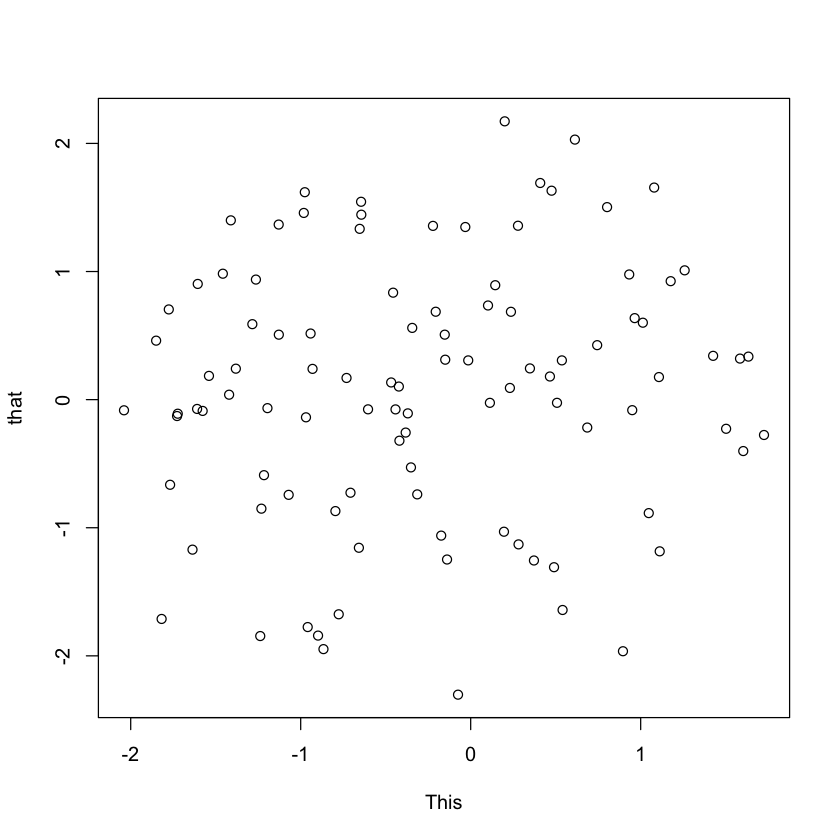

In [ ]:
rnorm(200) %>% matrix(ncol = 2) %T>% plot(xlab = "This", ylab = "that") %>% colSums 

In [ ]:
data.frame(z = rnorm(100)) %$% ts.plot(z)

ERROR: Error in data.frame(z = rnorm(100)) %$% ts.plot(z): could not find function "%$%"


# Chapter 5